In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

import numpy as np

import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import scipy
import seaborn as sns

In [39]:
# Print available datasets
!ls ../data/processed

89132-processed.pkl  89433-processed.pkl  89437-processed.pkl
89433-processed.csv  89437-processed.csv


In [2]:
tournament_id = 89433  # omit .pkl extension

In [3]:
df = pd.read_pickle(f"../data/processed/{tournament_id}-processed.pkl")
df.head()

,first_name,last_name,city,state,country,nationality,pdga_num,player_rating,rating_effective_date,player_class,result_id,tournament_division,tournament_place,tied_finish,formatted_place,shot_total,tournament_total_to_par,prize_usd,tournament_dnf,tournament_average_rating,tournament_rating_delta,score_id,round,tee_time,course_name,layout_name,par,round_score,score_to_par,round_dnf,num_birdies,num_bogeys,round_rating,num_holes,layout_length,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
0,Brandon,Martin,Mohnton,PA,US,None,199207,989,2025-10-14,Professional,212159772,MPO,1,False,1st,125,-11,647,False,1022,33,26391524,1,08:48:01,Nockamixon State Park,HooDoo,68,63,-5,False,8,3,1019,18,9289,5,5,2,3,3,6,3,3,3,3,3,3,4,5,2,3,3,4
1,Brandon,Martin,Mohnton,PA,US,None,199207,989,2025-10-14,Professional,212159772,MPO,1,False,1st,125,-11,647,False,1022,33,26419462,2,01:40:00,Nockamixon State Park,HooDoo,68,62,-6,False,7,1,1024,18,9289,6,3,2,3,3,4,3,4,3,4,3,3,4,4,3,3,4,3
2,Mike,Carman,Ottsville,PA,US,None,48559,995,2025-10-14,Professional,212122708,MPO,2,False,2nd,127,-9,431,False,1016,21,26391909,1,08:43:01,Nockamixon State Park,HooDoo,68,64,-4,False,7,3,1013,18,9289,5,3,2,3,3,4,4,4,4,4,5,2,4,6,2,2,3,4
3,Mike,Carman,Ottsville,PA,US,None,48559,995,2025-10-14,Professional,212122708,MPO,2,False,2nd,127,-9,431,False,1016,21,26419460,2,01:40:00,Nockamixon State Park,HooDoo,68,63,-5,False,6,1,1018,18,9289,5,3,3,3,3,4,3,4,4,3,3,3,4,6,3,2,4,3
4,Andrew,Fish,Baltimore,MD,US,None,58320,1009,2025-10-14,Professional,211964506,MPO,4,False,4th,132,-4,250,False,999,-10,26391664,1,08:44:01,Nockamixon State Park,HooDoo,68,64,-4,False,6,2,1013,18,9289,6,3,2,4,3,4,3,4,4,4,3,3,4,5,4,2,3,3


## Nockamixon analysis only
Exclude data from the AGA rounds

In [4]:
df = df.query("course_name == 'Nockamixon State Park'").copy()

# Drop dnf rounds
df = df[~df.round_dnf].copy()

df = df.reset_index(drop=True).copy()
#df.head()

## Exclude columns not germane to this analysis

In [5]:
df.columns

Index(['first_name', 'last_name', 'city', 'state', 'country', 'nationality',
       'pdga_num', 'player_rating', 'rating_effective_date', 'player_class',
       'result_id', 'tournament_division', 'tournament_place', 'tied_finish',
       'formatted_place', 'shot_total', 'tournament_total_to_par', 'prize_usd',
       'tournament_dnf', 'tournament_average_rating',
       'tournament_rating_delta', 'score_id', 'round', 'tee_time',
       'course_name', 'layout_name', 'par', 'round_score', 'score_to_par',
       'round_dnf', 'num_birdies', 'num_bogeys', 'round_rating', 'num_holes',
       'layout_length', 'Hole 1', 'Hole 2', 'Hole 3', 'Hole 4', 'Hole 5',
       'Hole 6', 'Hole 7', 'Hole 8', 'Hole 9', 'Hole 10', 'Hole 11', 'Hole 12',
       'Hole 13', 'Hole 14', 'Hole 15', 'Hole 16', 'Hole 17', 'Hole 18'],
      dtype='object')

In [6]:
df = df[['first_name', 'last_name', 'city', 'state', 'country', 'nationality',
       'pdga_num', 'player_rating', 
         #'rating_effective_date', 
         'player_class',
       #'result_id', 
         'tournament_division', 'tournament_place', 'tied_finish',
       #'formatted_place', 
         #'shot_total', 'tournament_total_to_par', 
         'prize_usd',
       #'tournament_dnf', 'tournament_average_rating',
       #'tournament_rating_delta', 
         'score_id', 'round', 'tee_time',
       #'course_name', 'layout_name', 
         #'par', 
         'round_score', 'score_to_par',
       #'round_dnf', 
         'num_birdies', 'num_bogeys', 'round_rating', #
        #'num_holes','layout_length', 
         'Hole 1', 'Hole 2', 'Hole 3', 'Hole 4', 'Hole 5',
       'Hole 6', 'Hole 7', 'Hole 8', 'Hole 9', 'Hole 10', 'Hole 11', 'Hole 12',
       'Hole 13', 'Hole 14', 'Hole 15', 'Hole 16', 'Hole 17', 'Hole 18']]

df.head()

,first_name,last_name,city,state,country,nationality,pdga_num,player_rating,player_class,tournament_division,tournament_place,tied_finish,prize_usd,score_id,round,tee_time,round_score,score_to_par,num_birdies,num_bogeys,round_rating,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
0,Brandon,Martin,Mohnton,PA,US,None,199207,989,Professional,MPO,1,False,647,26391524,1,08:48:01,63,-5,8,3,1019,5,5,2,3,3,6,3,3,3,3,3,3,4,5,2,3,3,4
1,Brandon,Martin,Mohnton,PA,US,None,199207,989,Professional,MPO,1,False,647,26419462,2,01:40:00,62,-6,7,1,1024,6,3,2,3,3,4,3,4,3,4,3,3,4,4,3,3,4,3
2,Mike,Carman,Ottsville,PA,US,None,48559,995,Professional,MPO,2,False,431,26391909,1,08:43:01,64,-4,7,3,1013,5,3,2,3,3,4,4,4,4,4,5,2,4,6,2,2,3,4
3,Mike,Carman,Ottsville,PA,US,None,48559,995,Professional,MPO,2,False,431,26419460,2,01:40:00,63,-5,6,1,1018,5,3,3,3,3,4,3,4,4,3,3,3,4,6,3,2,4,3
4,Andrew,Fish,Baltimore,MD,US,None,58320,1009,Professional,MPO,4,False,250,26391664,1,08:44:01,64,-4,6,2,1013,6,3,2,4,3,4,3,4,4,4,3,3,4,5,4,2,3,3


In [7]:
df.shape

(120, 39)

In [8]:
# Export to csv
#df.to_csv(f"../data/processed/{tournament_id}-processed.csv", index=False)

## Univariate analysis

### Hole scores

In [9]:
hole_list = []
for i in range(1, 19):
    hole_list.append(f"Hole {i}")

agg_functions = ['mean', 'std', 'min', 'max']

# Hole pars
par = [5, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 4, 5, 3, 3, 4, 4]

#### Performance of the entire field

In [10]:
df[hole_list].agg(agg_functions).round(2)

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
mean,5.84,3.96,2.88,4.23,3.44,4.49,3.29,4.45,4.67,4.21,4.04,3.16,4.59,5.38,3.20,2.98,4.19,4.42
std,1.03,0.93,0.76,0.88,0.75,0.66,0.69,0.81,1.02,0.73,0.91,0.67,0.81,0.90,0.73,0.65,0.65,0.77
min,4.00,3.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,2.00,2.00,3.00,3.00
max,9.00,7.00,5.00,8.00,6.00,7.00,5.00,7.00,9.00,8.00,7.00,5.00,7.00,9.00,5.00,7.00,6.00,6.00


## Barplots of individual holes for the entire field

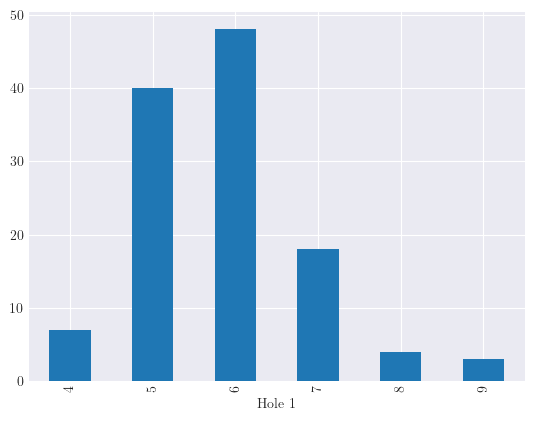

In [11]:
df["Hole 1"].value_counts().sort_index().plot(kind="bar")
plt.show()

In [12]:
max_score = df.iloc[0:, 21:].max().max()
min_score = df.iloc[0:, 21:].min().min()

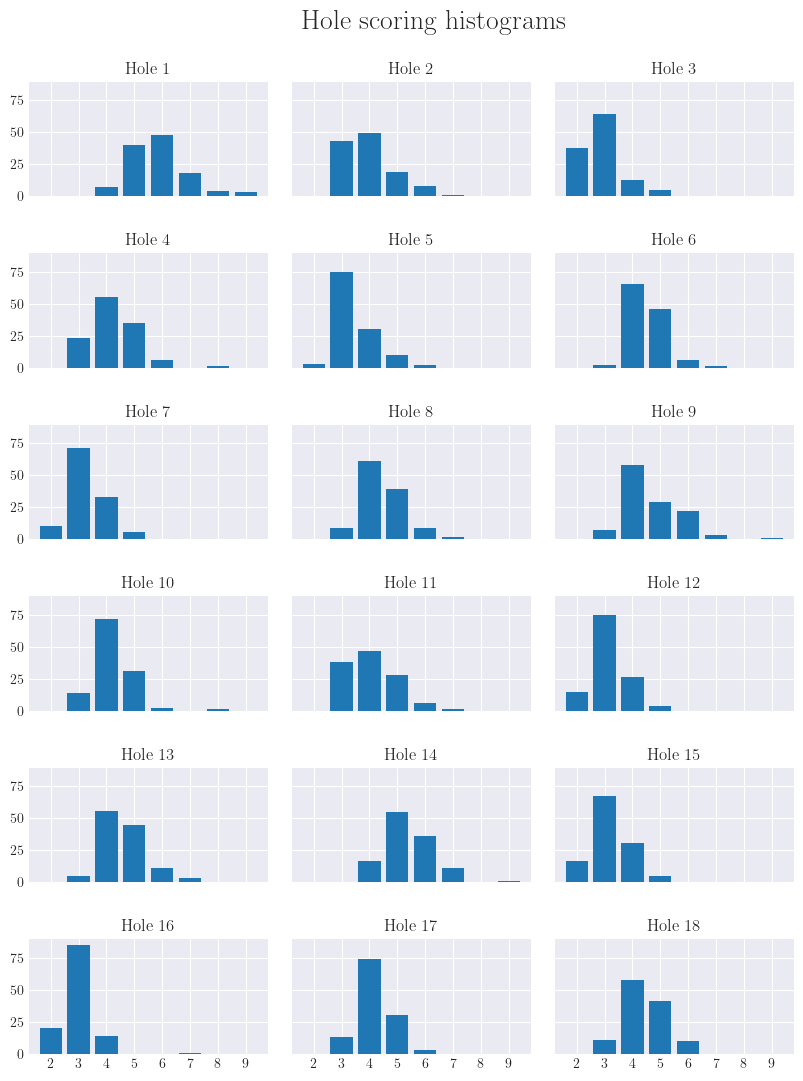

In [13]:
vals = range(min_score, max_score + 1)

fig, axs = plt.subplots(6, 3, sharex=True, sharey=True, figsize = (9, 12))
fig.suptitle("Hole scoring histograms", fontsize=20)

for i in range(18):
    
    counts = df[f"Hole {i+1}"].value_counts().to_dict()
    for v in vals:
        if v not in counts.keys():
            counts[v] = 0
    
    ax = axs[i // 3, i%3]
    
    ax.bar(counts.keys(), counts.values())
    #df[f"Hole {i + 1.plot(ax=ax, kind='bar', fontsize=14, title=f"Hole {i+1}")
    ax.set_title(f"Hole {i+1}", fontsize=12)
    ax.set_xticks(vals)
    #ax.set_xlabel("")
    
fig.subplots_adjust(top=0.92, left=0.05, hspace=0.5, wspace=0.1)
plt.show()

## Same but relative par

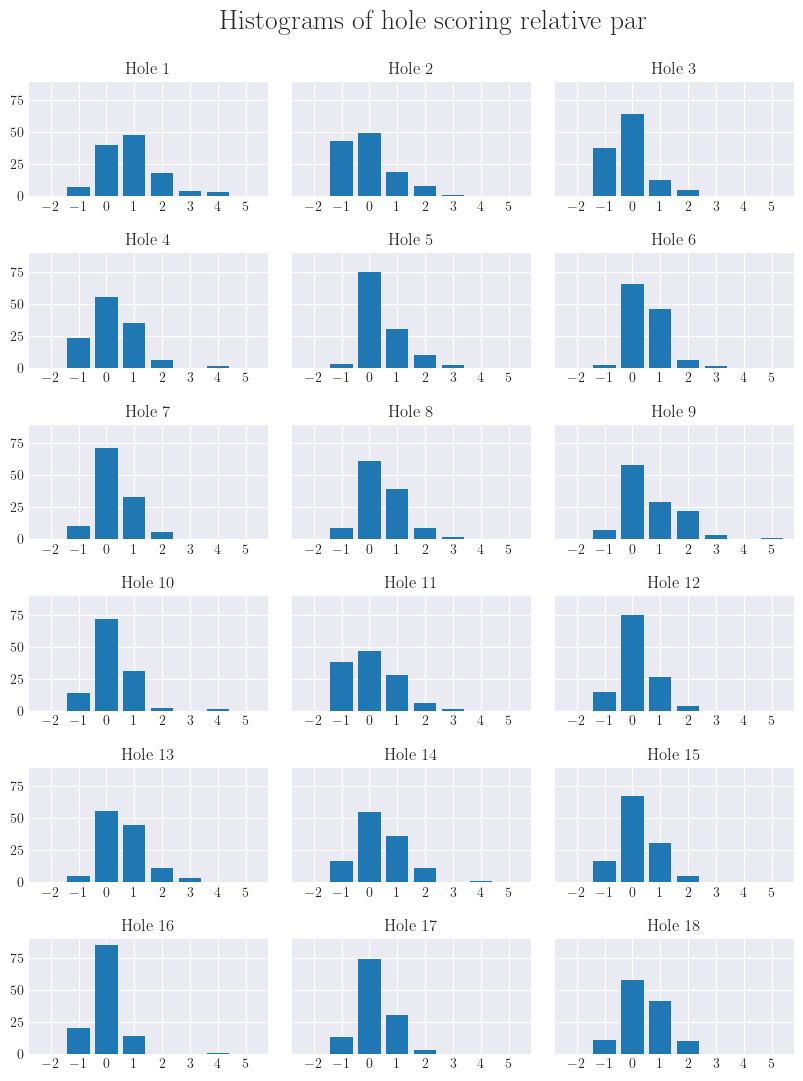

In [14]:
vals = range(-2, 6)

fig, axs = plt.subplots(6, 3, sharey=True, figsize = (9, 12))
fig.suptitle("Histograms of hole scoring relative par", fontsize=20)

for i in range(18):
    
    rel_par = df[f"Hole {i+1}"] - par[i]
    counts = rel_par.value_counts().to_dict()
    
    
    for v in vals:
        if v not in counts.keys():
            counts[v] = 0
    
    ax = axs[i // 3, i%3]
    
    ax.bar(counts.keys(), counts.values())
    #df[f"Hole {i + 1.plot(ax=ax, kind='bar', fontsize=14, title=f"Hole {i+1}")
    ax.set_title(f"Hole {i+1}", fontsize=12)
    ax.set_xticks(vals)
    #ax.set_xlabel("")
    
fig.subplots_adjust(top=0.92, left=0.05, hspace=0.5, wspace=0.1)
plt.show()

<Axes: >

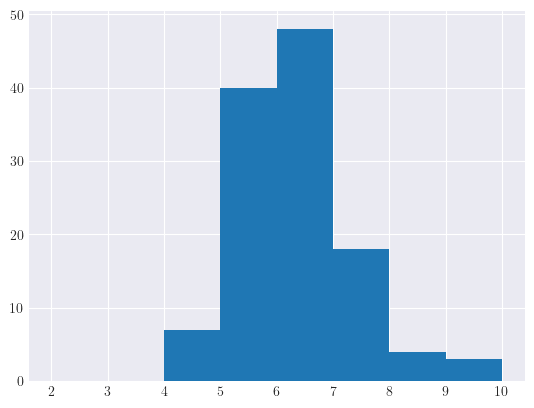

In [15]:
df['Hole 1'].hist(bins=range(2, 11, 1))

<Axes: xlabel='Hole 1'>

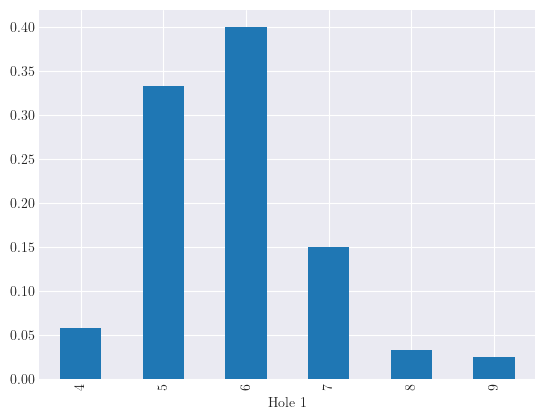

In [16]:
df["Hole 1"].value_counts(normalize=True).sort_index().plot(kind='bar', width=0.5)

<Axes: xlabel='Hole 1', ylabel='count'>

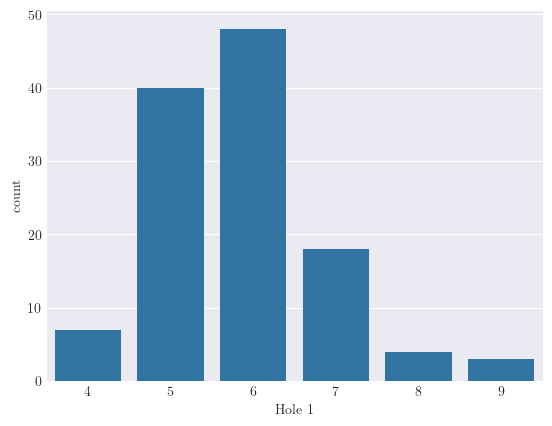

In [17]:
sns.countplot(data=df, x="Hole 1")

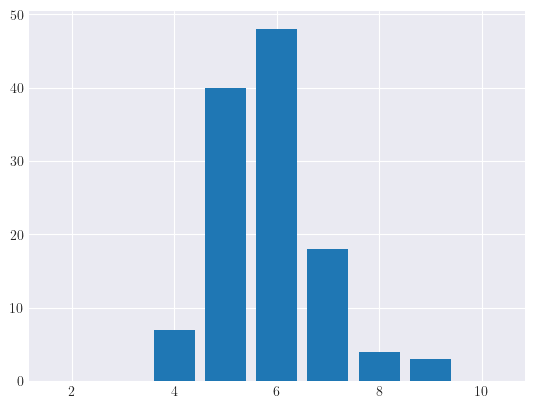

In [18]:
c = df["Hole 1"].value_counts()
cc = {}
for n in range(2, 11):
    val = c.get(key=n)
    if val:
        cc[n] = val
    else:
        cc[n] = 0
    
#print(cc)

#plt.plot(cc.keys(), cc.values())
plt.bar(x= cc.keys(), height=cc.values())
plt.show()

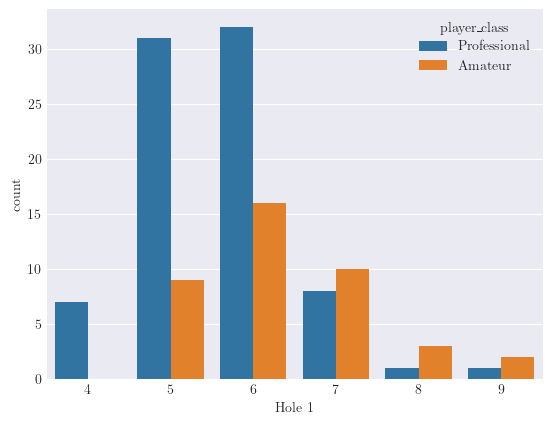

In [19]:
sns.countplot(data=df, x="Hole 1", hue = "player_class")
plt.show()

<Axes: xlabel='Hole 1'>

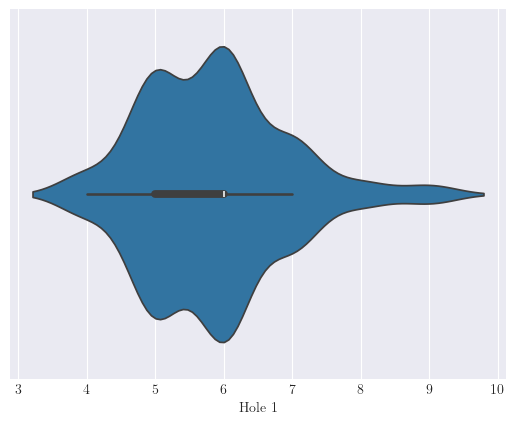

In [20]:
sns.violinplot(data=df, x="Hole 1")

<Axes: xlabel='Hole 1'>

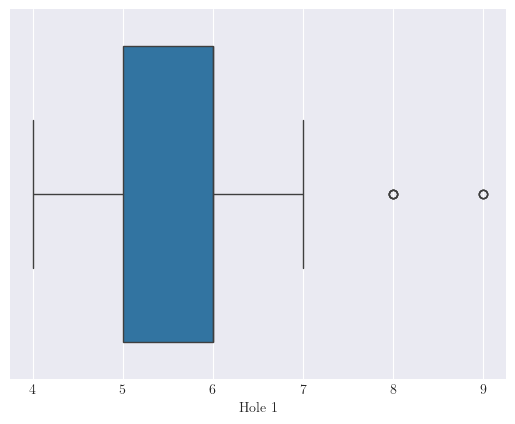

In [21]:
sns.boxplot(data=df, x="Hole 1")

## Feature relationships

In [22]:
df.groupby("tournament_division")[hole_list].agg(agg_functions).round(2)

Hole 1               Hole 2               Hole 3        \
                      mean   std min max   mean   std min max   mean   std   
tournament_division                                                          
MA1                   6.30  1.07   5   9   4.00  0.88   3   7   2.98  0.86   
MP40                  5.50  0.53   5   6   3.62  1.06   3   6   2.38  0.52   
MP50                  5.60  0.84   4   7   4.10  0.57   3   5   3.00  0.94   
MPO                   5.63  1.00   4   9   3.95  1.00   3   6   2.85  0.67   

                            Hole 4               Hole 5               Hole 6  \
                    min max   mean   std min max   mean   std min max   mean   
tournament_division                                                            
MA1                   2   5   4.45  0.78   3   6   3.62  0.93   2   6   4.68   
MP40                  2   3   3.75  0.71   3   5   3.25  0.46   3   4   4.38   
MP50                  2   5   4.50  0.71   3   5   3.70  1.06   2   5   4.70   
MPO                   2   4   4.11  0.94   3   8   3.31  0.56   2   5   4.35   

                                  Hole 7               Hole 8                \
                      std min max   mean   std min max   mean   std min max   
tournament_division                                                           
MA1                  0.66   4   7   3.60  0.74   2   5   4.70  0.82   4   7   
MP40                 0.52   4   5   3.25  0.71   2   4   4.12  0.35   4   5   
MP50                 0.67   4   6   3.30  0.48   3   4   4.20  0.79   3   5   
MPO                  0.66   3   6   3.10  0.62   2   5   4.37  0.81   3   6   

                    Hole 9               Hole 10               Hole 11        \
                      mean   std min max    mean   std min max    mean   std   
tournament_division                                                            
MA1                   4.80  0.76   4   6    4.32  0.94   3   8    4.10  0.93   
MP40                  4.38  0.74   4   6    4.00  0.00   4   4    3.62  0.74   
MP50                  5.30  1.16   4   7    4.40  0.52   4   5    4.10  0.99   
MPO                   4.52  1.13   3   9    4.13  0.64   3   5    4.05  0.91   

                            Hole 12               Hole 13                \
                    min max    mean   std min max    mean   std min max   
tournament_division                                                       
MA1                   3   7    3.28  0.78   2   5    4.72  0.85   3   7   
MP40                  3   5    3.38  0.74   3   5    4.25  0.71   3   5   
MP50                  3   6    3.10  0.57   2   4    4.50  0.53   4   5   
MPO                   3   6    3.06  0.60   2   4    4.56  0.84   3   7   

                    Hole 14               Hole 15               Hole 16        \
                       mean   std min max    mean   std min max    mean   std   
tournament_division                                                             
MA1                    5.55  0.78   4   7    3.42  0.71   2   5    3.12  0.79   
MP40                   5.50  1.07   4   7    2.88  0.64   2   4    3.00  0.76   
MP50                   5.60  0.52   5   6    3.70  0.67   3   5    3.00  0.47   
MPO                    5.21  0.98   4   9    3.02  0.69   2   5    2.89  0.55   

                            Hole 17               Hole 18                
                    min max    mean   std min max    mean   std min max  
tournament_division                                                      
MA1                   2   7     4.5  0.64   3   6    4.70  0.76   3   6  
MP40                  2   4     4.0  0.00   4   4    4.50  0.53   4   5  
MP50                  2   4     4.3  0.48   4   5    4.50  0.71   4   6  
MPO                   2   4     4.0  0.65   3   6    4.21  0.77   3   6

In [23]:
round(df.groupby(by="tournament_division")["Hole 1"].agg('mean').sort_values(), 1)

tournament_division
MP40    5.5
MP50    5.6
MPO     5.6
MA1     6.3
Name: Hole 1, dtype: float64

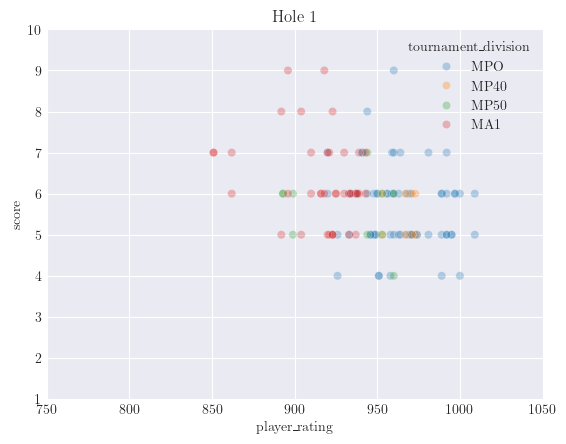

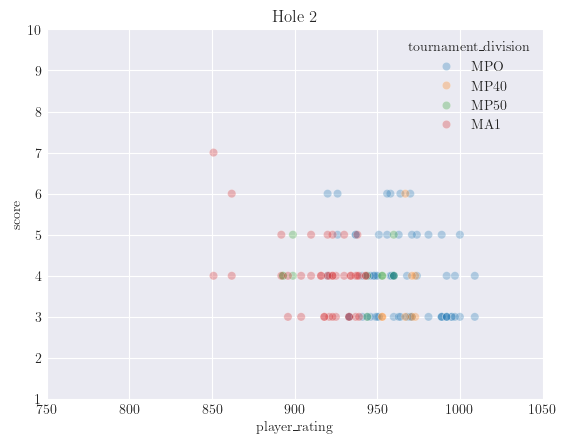

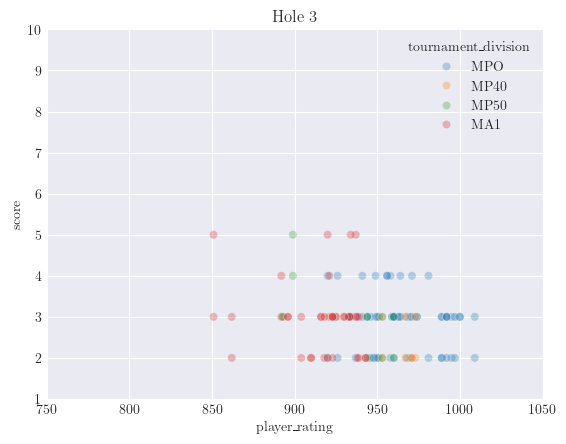

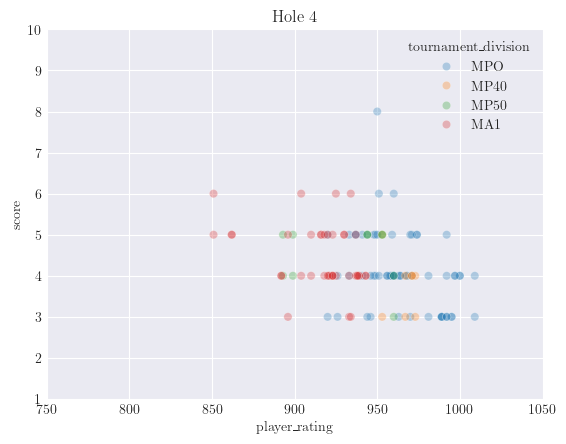

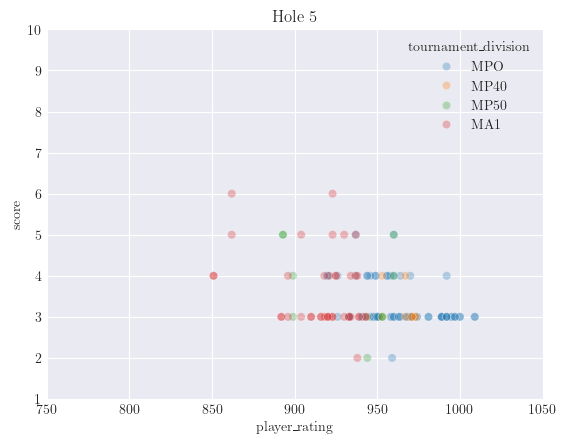

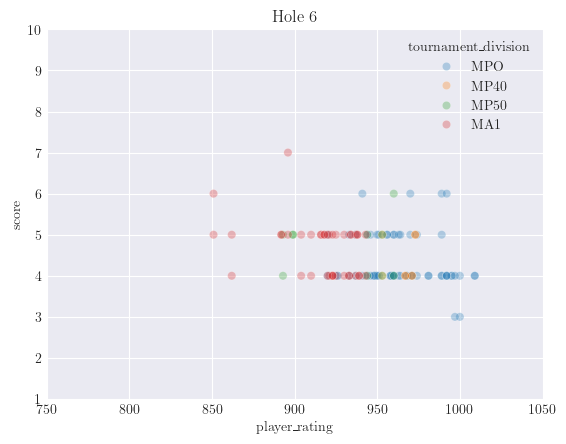

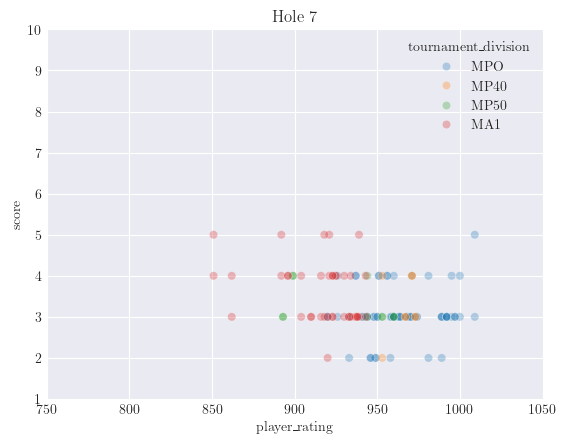

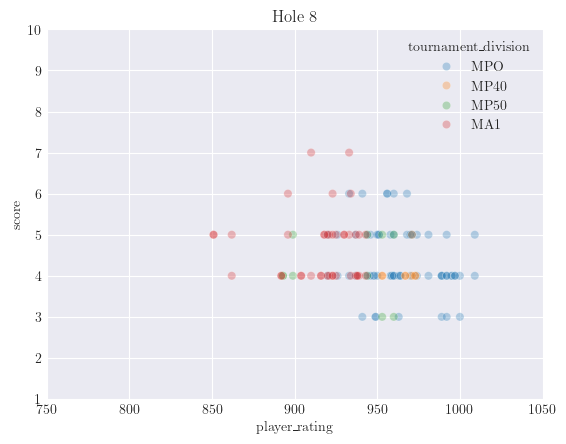

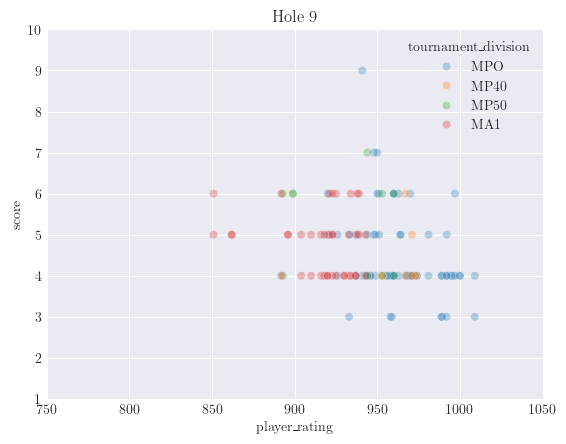

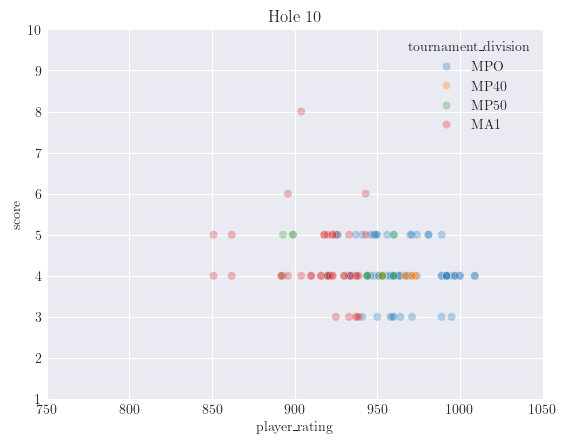

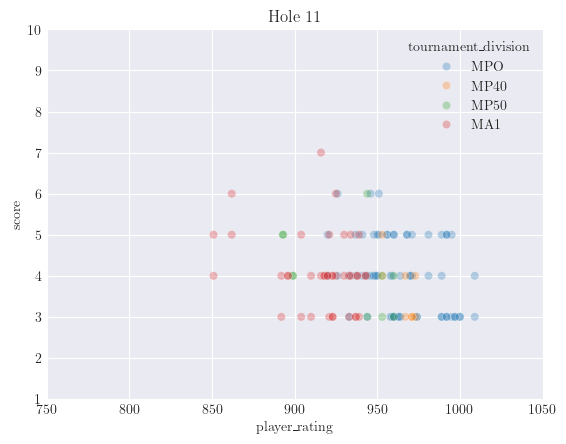

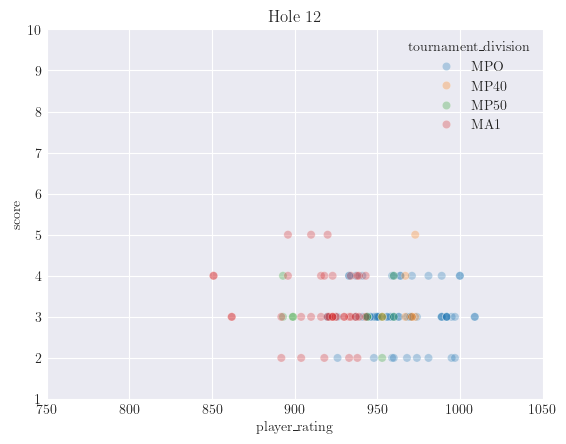

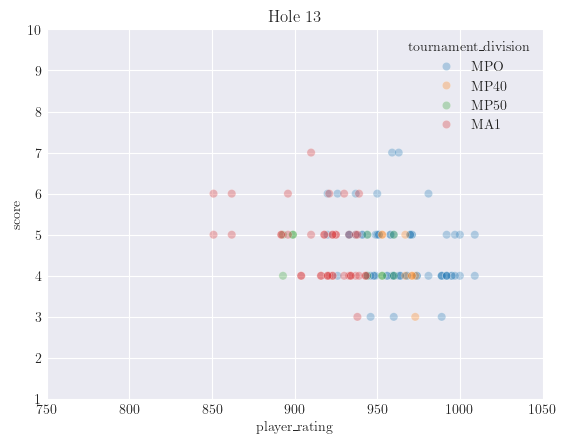

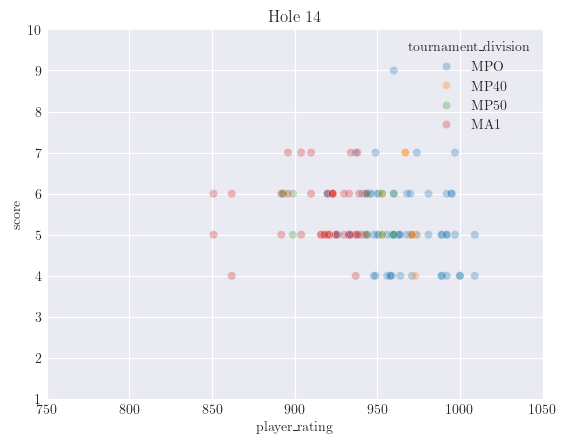

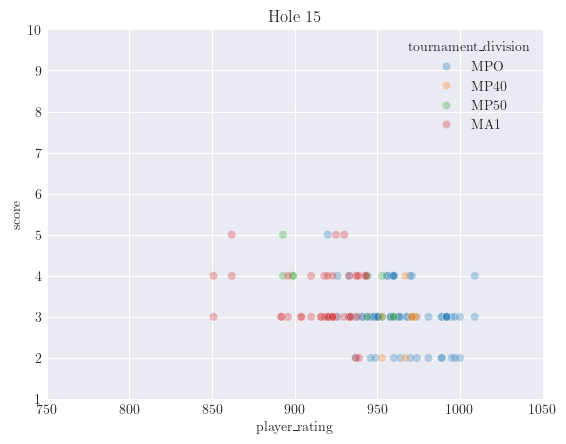

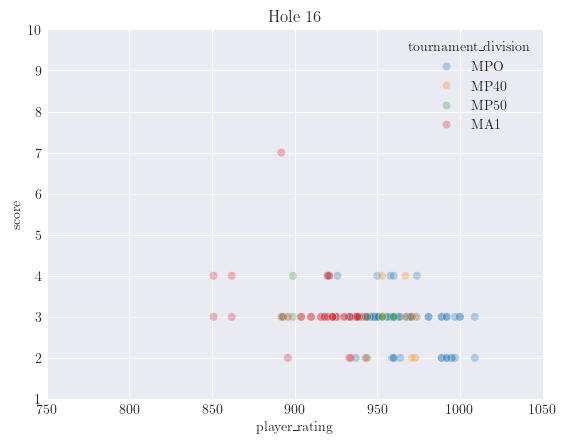

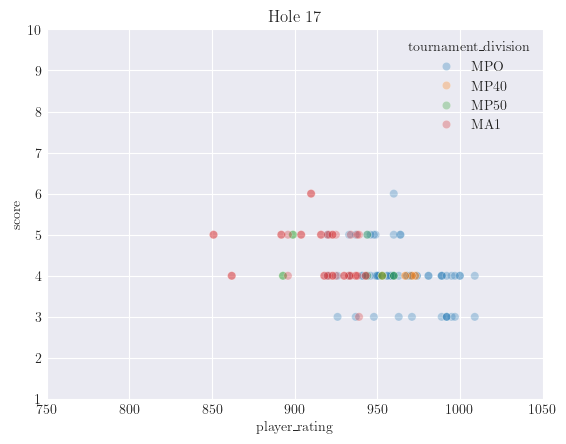

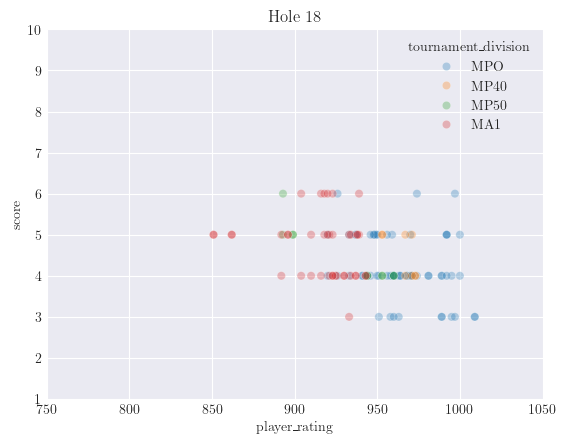

In [24]:
for i in range(1, 19):
    
    ax = sns.scatterplot(data = df, x = "player_rating", y = f"Hole {i}", hue = "tournament_division", alpha = 0.3)
    ax.set_xlim([750, 1050])
    ax.set_ylim([1, 10])
    ax.set_title(f"Hole {i}")
    ax.set_ylabel("score")
    plt.show()

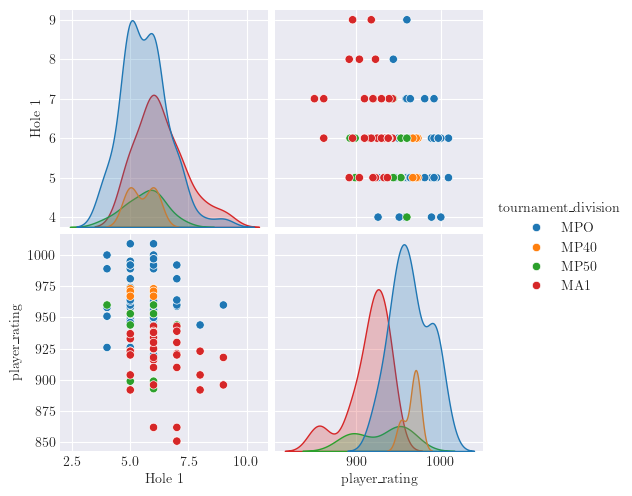

In [25]:
ax = sns.pairplot(df, vars=["Hole 1", "player_rating"], hue = "tournament_division", diag_kind='kde')

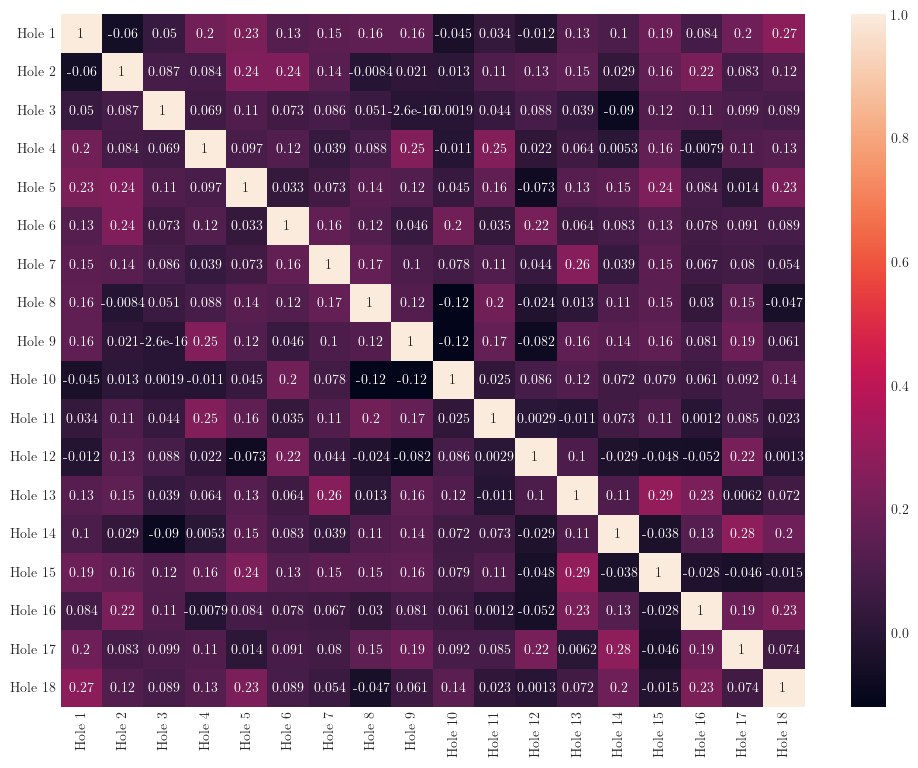

In [26]:
fig, ax = plt.subplots(figsize=(12,9))

sns.heatmap(df[hole_list].corr(), annot=True)
plt.show()

<Axes: xlabel='Hole 1', ylabel='Hole 2'>

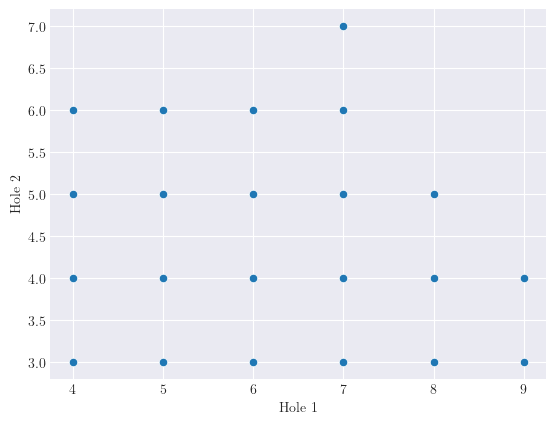

In [27]:
sns.scatterplot(data=df, x="Hole 1", y="Hole 2")

In [28]:
df[df["Hole 2"] == 2]

,first_name,last_name,city,state,country,nationality,pdga_num,player_rating,player_class,tournament_division,tournament_place,tied_finish,prize_usd,score_id,round,tee_time,round_score,score_to_par,num_birdies,num_bogeys,round_rating,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18


In [29]:
df[df["Hole 11"] == 2]

,first_name,last_name,city,state,country,nationality,pdga_num,player_rating,player_class,tournament_division,tournament_place,tied_finish,prize_usd,score_id,round,tee_time,round_score,score_to_par,num_birdies,num_bogeys,round_rating,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18


## Hole sorting power

Creat

## Questions
* What are the hardest/easiest holes?  Are they different for different divisions?
* Do the scores of certain holes correlate with another?  Something akin to certain people playing long holes well.
* Which holes provide the flattest scoring i.e. least scoring separation?  Scores bunch together and don't differentiate between better/worse play
* Do the number of birdies or bogies contribute differently to overall scoring?
* Do locals (i.e. those that live closer to course) score better?

In [30]:
sns.set_theme()